In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('/datasets/Churn.csv')

In [4]:
print(data.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0     2.0       0.00              1          1               1   
1     1.0   83807.86              1          0               1   
2     8.0  159660.80              3          1               0   
3     1.0       0.00              2          0               0   
4     2.0  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB
None


In [6]:
data.dropna(subset=['Tenure'], inplace=True)

visto que tenure tem 9091 non-null, temos 9091 valores não nulos

agora embaixo vamos remover colunas que não vão ser interessantes para nosso modelo de predição

In [7]:
data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [8]:
print(data.head())

   CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42     2.0       0.00              1   
1          608     Spain  Female   41     1.0   83807.86              1   
2          502    France  Female   42     8.0  159660.80              3   
3          699    France  Female   39     1.0       0.00              2   
4          850     Spain  Female   43     2.0  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0  


Agora, vamos fazer a codificação de variáveis categóricas 

In [9]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Geography'] = label_encoder.fit_transform(data['Geography'])
data['Gender'] = label_encoder.fit_transform(data['Gender'])

In [10]:
print(data.head())

   CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619          0       0   42     2.0       0.00              1   
1          608          2       0   41     1.0   83807.86              1   
2          502          0       0   42     8.0  159660.80              3   
3          699          0       0   39     1.0       0.00              2   
4          850          2       0   43     2.0  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0  


In [11]:
#separando variáveis independentes de dependentes
x = data.drop('Exited', axis=1)  # Recursos
y = data['Exited']  # Alvo

In [12]:

#separando dados em conjuntos de testes
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=12345)


In [13]:
#mesma escala
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

0    7237
1    1854
Name: Exited, dtype: int64


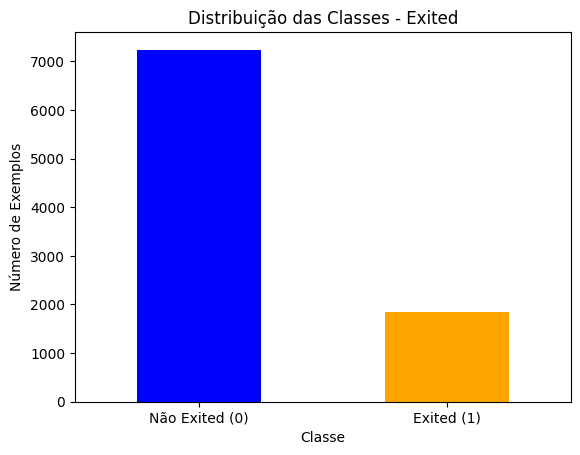

In [14]:
#Verificando o equilibro
# Contar a quantidade de exemplos em cada classe
class_distribution = y.value_counts()
print(class_distribution)

# Visualizar a distribuição
import matplotlib.pyplot as plt

class_distribution.plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribuição das Classes - Exited')
plt.xlabel('Classe')
plt.ylabel('Número de Exemplos')
plt.xticks(ticks=[0, 1], labels=['Não Exited (0)', 'Exited (1)'], rotation=0)
plt.show()

In [15]:
#treinar o modelo
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Criar e treinar o modelo
model = DecisionTreeClassifier(random_state=42)
model.fit(x_train, y_train)

# Fazer previsões
y_pred = model.predict(x_test)

# Avaliar o modelo
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1565  257]
 [ 228  223]]
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      1822
           1       0.46      0.49      0.48       451

    accuracy                           0.79      2273
   macro avg       0.67      0.68      0.67      2273
weighted avg       0.79      0.79      0.79      2273



O modelo previu corretamente que 1565 clientes não sairiam. O modelo previu que 257 clientes sairiam, mas na verdade não saíram. FN: 228 e TP: 223.
Recall de 49% para a classe Exited (1) indica que o modelo falha em identificar uma quantidade significativa de clientes que saem. Ou seja, muitos clientes que estão propensos a sair não estão sendo corretamente previstos. Modelo está tentando prever a classe majoritaria, ignorando a minoritaria.

In [16]:
#undersampling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score, roc_auc_score

# Juntar x e y para facilitar o undersampling
train_data = pd.DataFrame(x_train, columns=x.columns)
train_data['Exited'] = y_train.values
# Separar as classes
class_0 = train_data[train_data['Exited'] == 0]
class_1 = train_data[train_data['Exited'] == 1]

# Balancear removendo parte da classe 0
class_0_under = class_0.sample(len(class_1), random_state=42)
train_balanced = pd.concat([class_0_under, class_1])
# Separar novamente em X e y
x_train_bal = train_balanced.drop('Exited', axis=1)
y_train_bal = train_balanced['Exited']

# Treinar novamente com RandomForest
rf_bal = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=10)
rf_bal.fit(x_train_bal, y_train_bal)

y_pred_bal = rf_bal.predict(x_test)

print("\n=== RandomForest (com undersampling) ===")
print(classification_report(y_test, y_pred_bal))
print("F1:", f1_score(y_test, y_pred_bal))
print("ROC-AUC:", roc_auc_score(y_test, rf_bal.predict_proba(x_test)[:,1]))


=== RandomForest (com undersampling) ===
              precision    recall  f1-score   support

           0       0.93      0.79      0.85      1822
           1       0.47      0.75      0.58       451

    accuracy                           0.78      2273
   macro avg       0.70      0.77      0.71      2273
weighted avg       0.84      0.78      0.80      2273

F1: 0.5755517826825127
ROC-AUC: 0.8596703021216421


In [17]:
#segundo abordagem
rf_weighted = RandomForestClassifier(random_state=42, 
                                     n_estimators=200, 
                                     max_depth=10,
                                     class_weight='balanced')
rf_weighted.fit(x_train, y_train)

y_pred_weighted = rf_weighted.predict(x_test)

print("\n=== RandomForest (com class_weight='balanced') ===")
print(classification_report(y_test, y_pred_weighted))
print("F1:", f1_score(y_test, y_pred_weighted))
print("ROC-AUC:", roc_auc_score(y_test, rf_weighted.predict_proba(x_test)[:,1]))



=== RandomForest (com class_weight='balanced') ===
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1822
           1       0.60      0.64      0.62       451

    accuracy                           0.84      2273
   macro avg       0.76      0.77      0.76      2273
weighted avg       0.85      0.84      0.85      2273

F1: 0.6201716738197426
ROC-AUC: 0.860331109547998


Abordagem 1: não bateu o requisito de 0,59. A abordagem ajudou a aumentar o recall, que está muito bom, mas prejudicou a precisão. F1 ficou perto de 0,59, mas ainda não chegou. 
Abordagem 2: O F1 bateu o requisito, maior equilibrio entre precisão e recall.

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score, roc_auc_score, confusion_matrix

# Modelo final
final_model = RandomForestClassifier(random_state=42,
                                     class_weight='balanced',
                                     n_estimators=200,
                                     max_depth=10)
final_model.fit(x_train, y_train)

# Previsões no conjunto de teste
y_pred_final = final_model.predict(x_test)

# Métricas
print("=== TESTE FINAL: RandomForest (class_weight='balanced') ===")
print(confusion_matrix(y_test, y_pred_final))
print(classification_report(y_test, y_pred_final))
print("F1:", f1_score(y_test, y_pred_final))
print("ROC-AUC:", roc_auc_score(y_test, final_model.predict_proba(x_test)[:,1]))

=== TESTE FINAL: RandomForest (class_weight='balanced') ===
[[1630  192]
 [ 162  289]]
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1822
           1       0.60      0.64      0.62       451

    accuracy                           0.84      2273
   macro avg       0.76      0.77      0.76      2273
weighted avg       0.85      0.84      0.85      2273

F1: 0.6201716738197426
ROC-AUC: 0.860331109547998


O modelo RandomForest com class_weight='balanced' conseguiu superar o limite estabelecido (F1 ≥ 0.59), atingindo F1 = 0.62 no conjunto de teste final.
Além disso, o valor de ROC-AUC = 0.86 confirma que o modelo tem boa capacidade de discriminação entre as classes.